# bnlearn

## Install

## Bioconductor

[Installation instruction.](https://bioconductor.org/install/).

In [1]:
if (!require('BiocManager', quietly=TRUE))
    install.packages('BiocManager')
BiocManager::install(version='3.17')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Old packages: 'foreign', 'KernSmooth', 'Matrix', 'mgcv', 'nlme', 'spatial',
  'survival'



In [2]:
BiocManager::install(c('graph', 'Rgraphviz'))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'graph' 'Rgraphviz'”
Old packages: 'foreign', 'KernSmooth', 'Matrix', 'mgcv', 'nlme', 'spatial',
  'survival'



In [3]:
require('graph')

Loading required package: graph

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min




In [4]:
require('Rgraphviz')

Loading required package: Rgraphviz

Loading required package: grid



In [5]:
install.packages(c('bnlearn', 'gRain', 'graph'), dependencies=TRUE)

Warning message:
“package ‘graph’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”



The downloaded binary packages are in
	/var/folders/81/bc6js09x6t3g1314fgj0z2q80000gn/T//Rtmp1qB2LS/downloaded_packages


### Load library

In [6]:
library(bnlearn)
library(gRain)

Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, parents




## Graph

In [7]:
g <- empty.graph(nodes=c('X', 'Y'))
g <- set.arc(g, from='X', to='Y')

In [8]:
g


  Random/Generated Bayesian network

  model:
   [X][Y|X] 
  nodes:                                 2 
  arcs:                                  1 
    undirected arcs:                     0 
    directed arcs:                       1 
  average markov blanket size:           1.00 
  average neighbourhood size:            1.00 
  average branching factor:              0.50 

  generation algorithm:                  Empty 


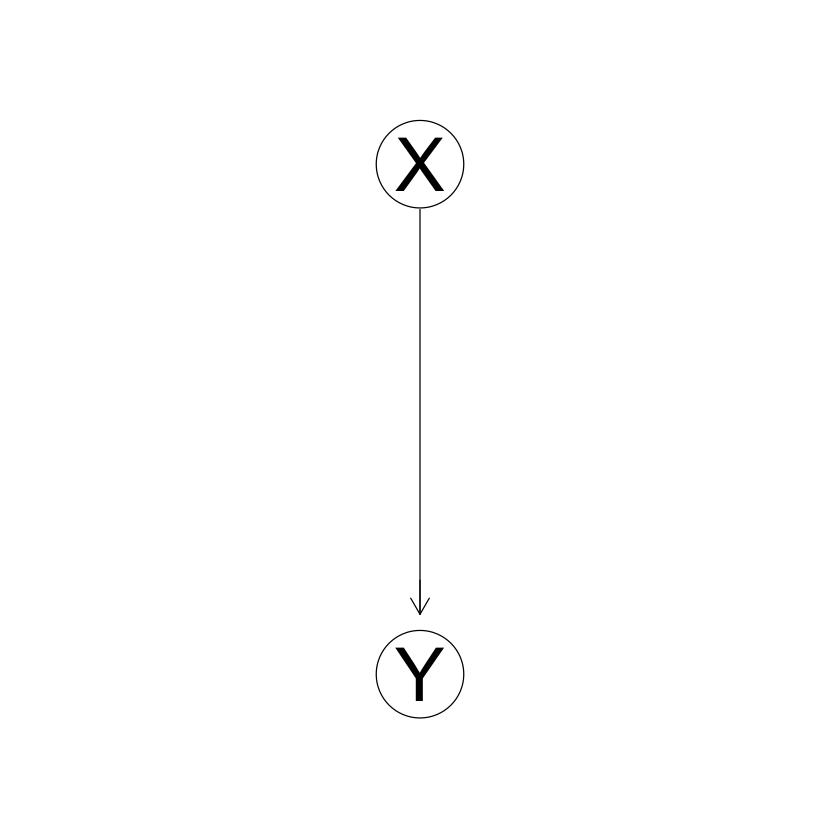

In [43]:
graphviz.plot(g)

## Parameters

In [9]:
X.lv <- c('off', 'on')
Y.lv <- c('off', 'on')

X.prob <- array(c(0.8, 0.2), dim=2, dimnames=list(X=X.lv))
Y.prob <- array(c(0.8, 0.2, 0.2, 0.8), dim=c(2, 2), dimnames=list(Y=Y.lv, X=X.lv))

p <- list(X=X.prob, Y=Y.prob)

In [10]:
p

,off,on
off,0.8,0.2
on,0.2,0.8


## BBN

In [11]:
b <- custom.fit(g, p)

In [12]:
nparams(b)

[1] 3

In [13]:
arcs(b)

from,to
X,Y


In [14]:
b$X


  Parameters of node X (multinomial distribution)

Conditional probability table:
 X
off  on 
0.8 0.2 

In [15]:
b$Y


  Parameters of node Y (multinomial distribution)

Conditional probability table:
 
     X
Y     off  on
  off 0.8 0.2
  on  0.2 0.8

In [16]:
b


  Bayesian network parameters

  Parameters of node X (multinomial distribution)

Conditional probability table:
 X
off  on 
0.8 0.2 

  Parameters of node Y (multinomial distribution)

Conditional probability table:
 
     X
Y     off  on
  off 0.8 0.2
  on  0.2 0.8


Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”
Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”


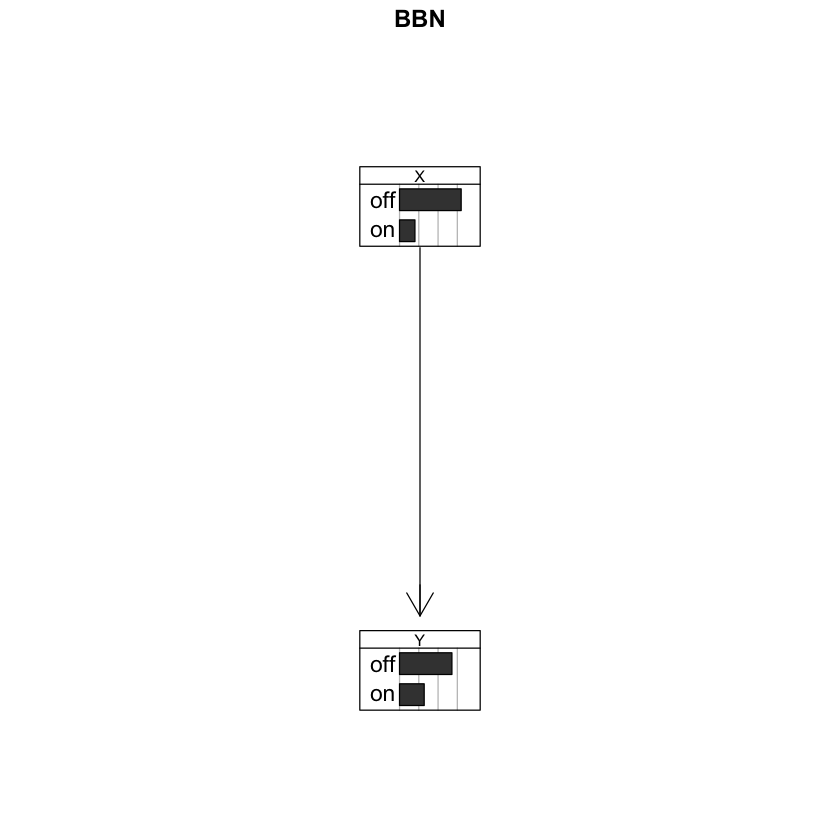

In [45]:
graphviz.chart(b, grid=TRUE, main='BBN')

## Tree

In [17]:
t <- compile(as.grain(b))

Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”
Warning message:
“Any reference to graphNEL objects will be removed in future versions of gRbase
Please use igraphs instead
”


In [18]:
t

Independence network: Compiled: TRUE Propagated: FALSE Evidence: FALSE 

In [19]:
querygrain(t, nodes='X')$X

X
off  on 
0.8 0.2

In [21]:
querygrain(t, nodes='Y')$Y

Y
 off   on 
0.68 0.32

## Evidence

In [22]:
e <- setEvidence(t, nodes='X', states='on')

In [25]:
querygrain(e, nodes='X')$X

NULL

In [26]:
querygrain(e, nodes='Y')$Y

Y
off  on 
0.2 0.8

In [38]:
querygrain(e, nodes='Y')$Y

Y
off  on 
0.2 0.8

In [39]:
querygrain(e, nodes=c('X','Y'))$Y

Y
off  on 
0.2 0.8

In [40]:
querygrain(e, nodes=c('X','Y'), type='joint')

Y
off  on 
0.2 0.8

In [41]:
querygrain(e, nodes=c('X','Y'), type='marginal')

$Y
Y
off  on 
0.2 0.8

In [42]:
querygrain(e, nodes=c('X','Y'), type='conditional')

Y
off  on 
0.2 0.8